# Notebook P3

### Librerías

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.impute import SimpleImputer

### Lectura de datos

In [44]:
train = pd.read_csv("practica3_datos/train.csv", na_values="NaN") # Definimos na_values para identificar bien los valores perdidos

In [45]:
print(train.columns)
str(len(train.columns))+" columnas"

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

'81 columnas'

# Visualización

Vamos a hacer varias visualizaciones del conjunto de datos dado.

### Heatmap
Para mostrar las correlaciones entre las variables

In [46]:
print("hola")

hola


### Distribution plot
1. **SalePrice**: Visualizo los valores de venta de entrenamiento.

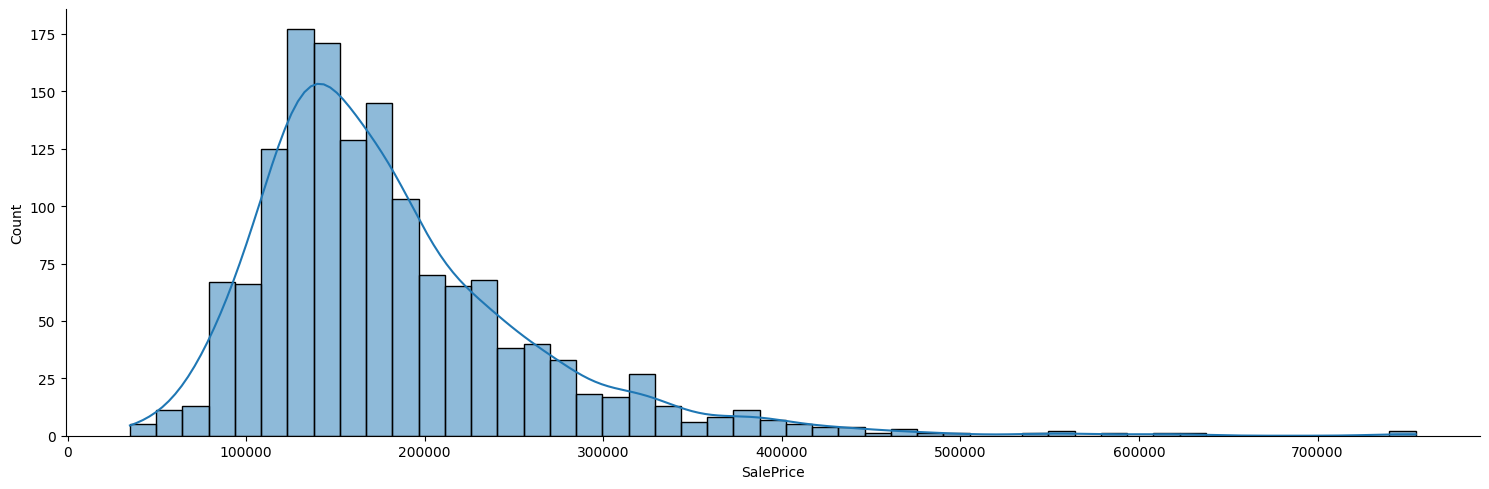

In [47]:
sns.displot(data=train, x="SalePrice", aspect=3, kde=True)

### Boxplot
Ahora visualizamos cómo cambia la distribución (usando un boxplot) según otro atributo, como el tipo de calle.
1. **Street**

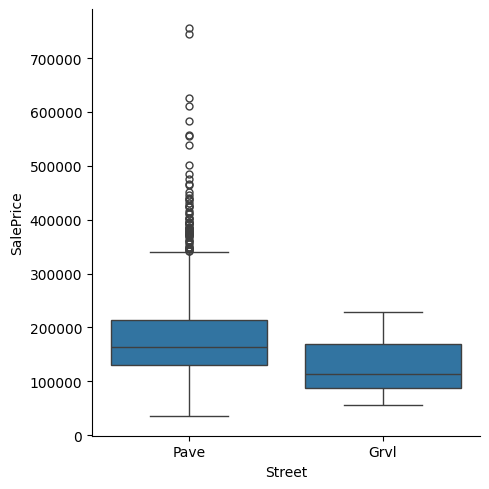

In [48]:
sns.catplot(data=train, y="SalePrice", x="Street", kind="box")

2. **OverallQual**: La calidad general de la casa podría estar relacionada con el precio de venta.

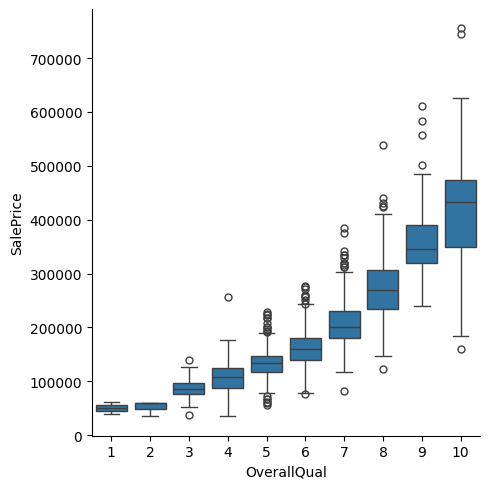

In [49]:
sns.catplot(data=train, y="SalePrice", x="OverallQual", kind="box")

3. **YearBuilt**: Puede ser interesante observar cómo se distribuyen las ventas en función del año de construcción de la casa.

El año más antiguo en 'YearBuilt' es: 1872
El año más reciente en 'YearBuilt' es: 2010


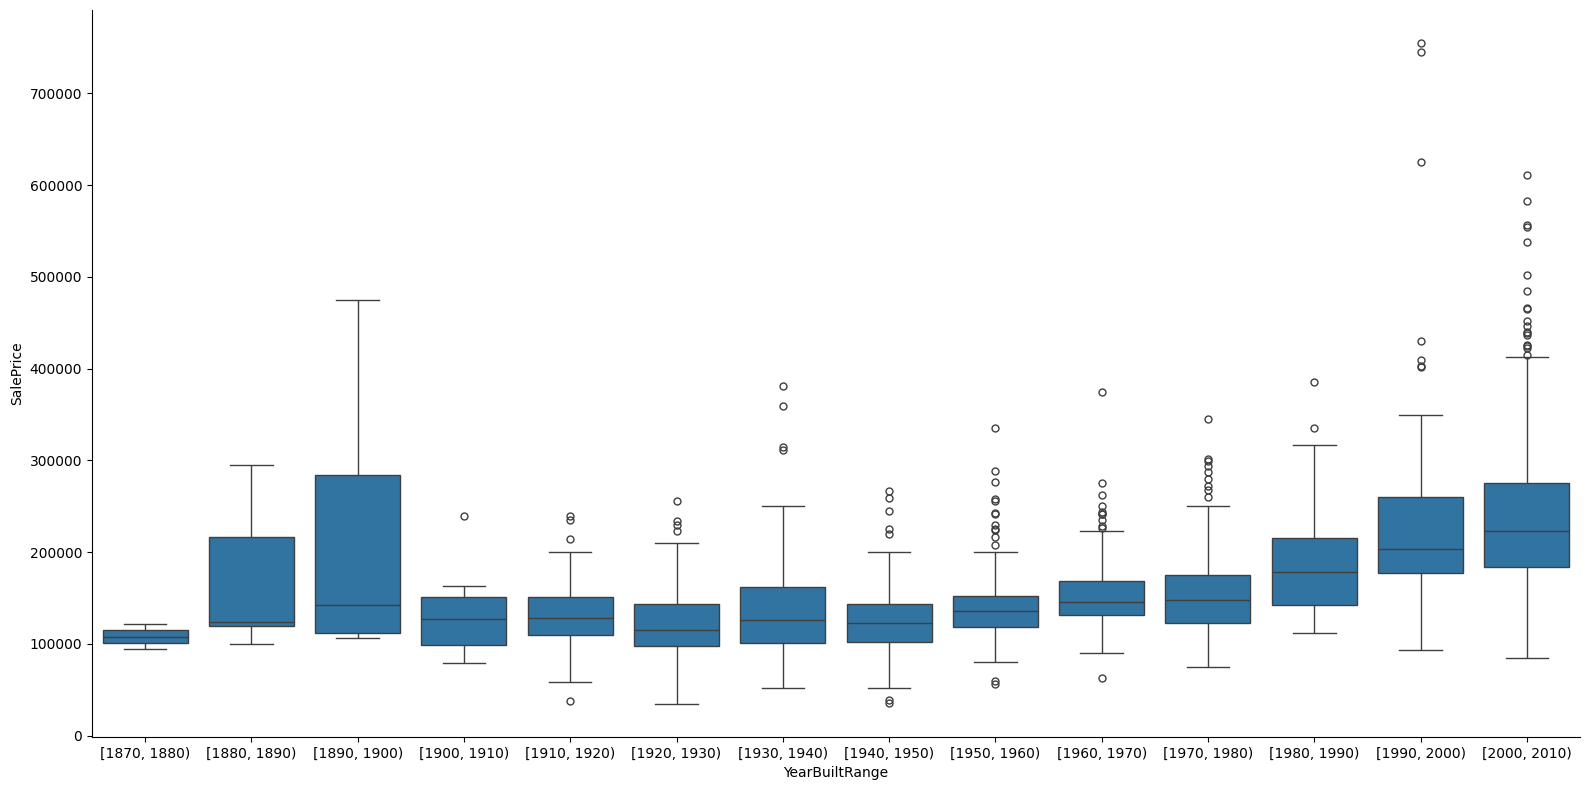

In [50]:
#Quiero saber el rango que abarca el atributo YearBuilt
min_year = train['YearBuilt'].min()
max_year = train['YearBuilt'].max()

print(f"El año más antiguo en 'YearBuilt' es: {min_year}")
print(f"El año más reciente en 'YearBuilt' es: {max_year}")

# Crear un nuevo DataFrame con la columna YearBuilt, donde voy a agrupar los ejemplos en rangos de 10 años
plot_data = train.copy()
plot_data['YearBuiltRange'] = pd.cut(plot_data['YearBuilt'], bins=range(1870, 2011, 10), right=False)

#sns.catplot(data=train, y="SalePrice", x="YearBuilt", kind="box", aspect=3,)
# Crear el catplot con los datos agrupados por 'YearBuiltRange'
sns.catplot(data=plot_data, y="SalePrice", x="YearBuiltRange", kind="box", height=8, aspect=2)

4. **YearRemodAdd**: Puede ser interesante observar cómo se distribuyen las ventas en función del año de la última reforma de la casa.

El año más antiguo en 'YearRemodAdd' es: 1950
El año más reciente en 'YearRemodAdd' es: 2010


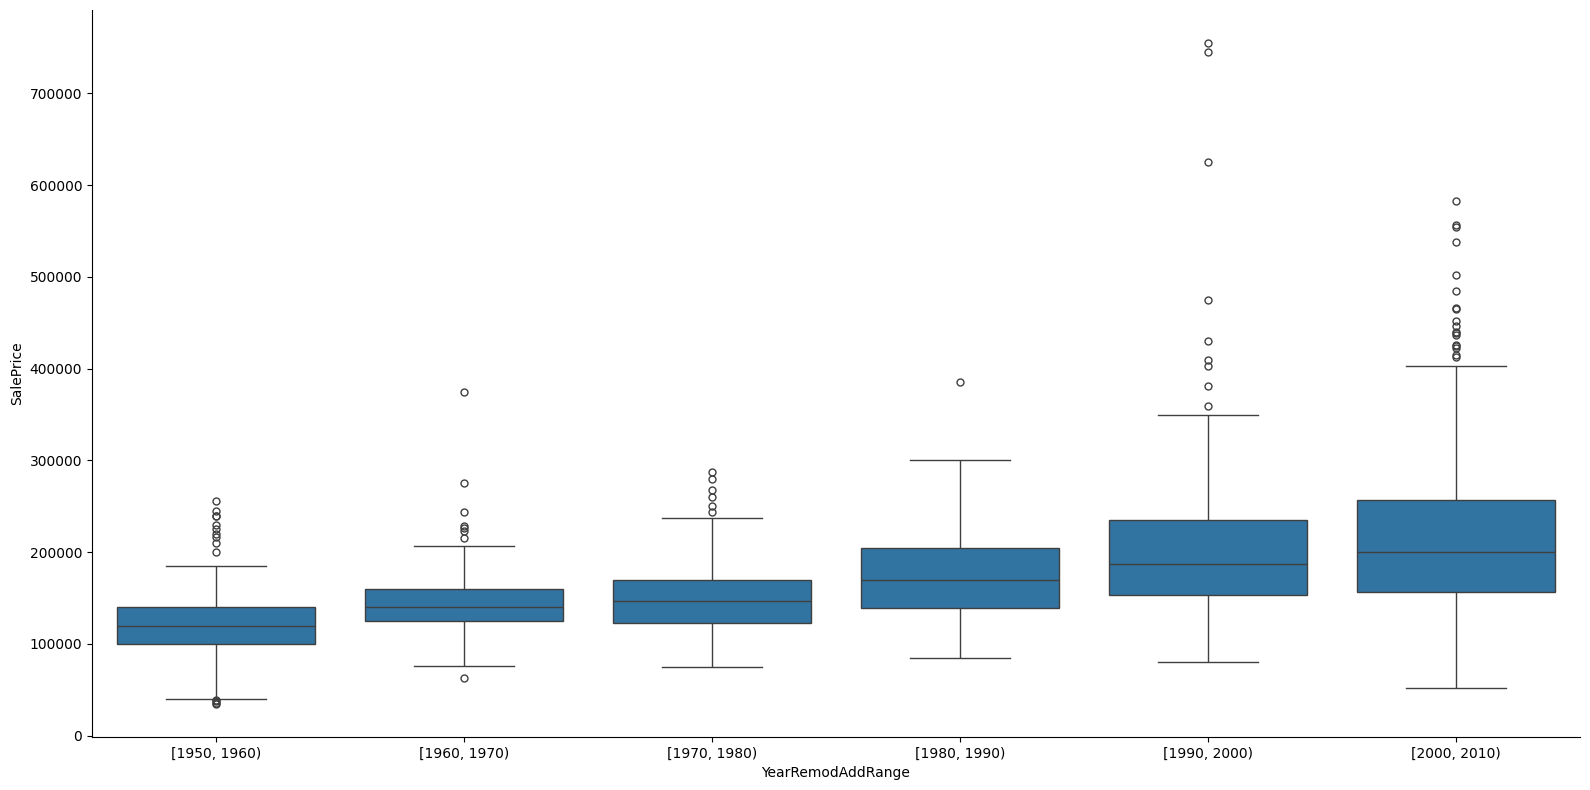

In [51]:
#Quiero saber el rango que abarca el atributo YearBuilt
min_year = train['YearRemodAdd'].min()
max_year = train['YearRemodAdd'].max()

print(f"El año más antiguo en 'YearRemodAdd' es: {min_year}")
print(f"El año más reciente en 'YearRemodAdd' es: {max_year}")

# Crear un nuevo DataFrame con la columna YearBuilt, donde voy a agrupar los ejemplos en rangos de 10 años
plot_data = train.copy()
plot_data['YearRemodAddRange'] = pd.cut(plot_data['YearRemodAdd'], bins=range(1950, 2011, 10), right=False)

#sns.catplot(data=train, y="SalePrice", x="YearBuilt", kind="box", aspect=3,)
# Crear el catplot con los datos agrupados por 'YearBuiltRange'
sns.catplot(data=plot_data, y="SalePrice", x="YearRemodAddRange", kind="box", height=8, aspect=2)

## Procesar datos

Vamos a procesar datos:
- Outliers
- Valores perdidos: eliminamos los atributos con muchos missing values e imputamos el resto de missing values.
- Etiquetado.

Primero quito el Id de train que no me sirve de nada, y complica el etiquetado. También la quito de test pero antes lo guardo (para el fichero de salida)

In [52]:
if 'Id' in train:
    train.drop('Id', axis=1, inplace=True)

In [53]:
test = pd.read_csv("practica3_datos/test.csv", na_values="NaN")
test_ids = test.Id #Guardo el Id del archivo test para luego adjuntarlo en el fichero de salida
test = test.drop('Id', axis=1)

### Eliminamos outliers
Visualizamos con un scatter plot la relación entre SalePrice y algunos atributos

In [54]:
fig = plt.figure(figsize=(10,10))

def scatter_plot(atributo, datos):
    fig, ax = plt.subplots()
    ax.scatter(x = datos[atributo], y = datos['SalePrice'], edgecolor='black')
    plt.ylabel('SalePrice', fontsize=10)
    plt.xlabel(atributo, fontsize=10)
    plt.show()

<Figure size 1000x1000 with 0 Axes>

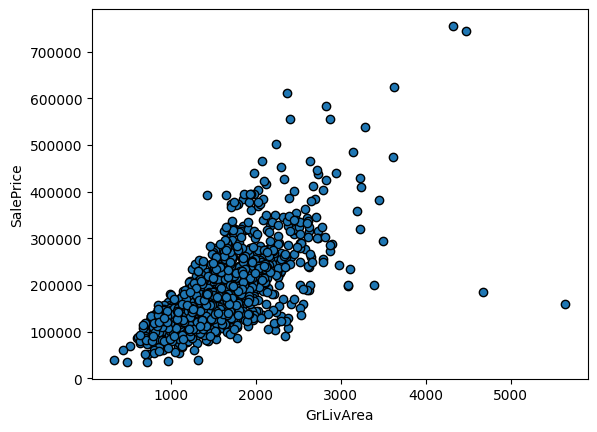

In [55]:
scatter_plot('GrLivArea', train)

Observamos que hay casas con mucho terreno pero que mantienen el precio bajo. Al mismo tiempo que hay otras que tienen precios desorbitados, pero esto no se sale de la distribución. 

In [56]:
#Eliminamos los outliers y mostramos de nuevo la gráfica
train=train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice']<200000)].index)
#scatter_plot('GrLivArea', train)

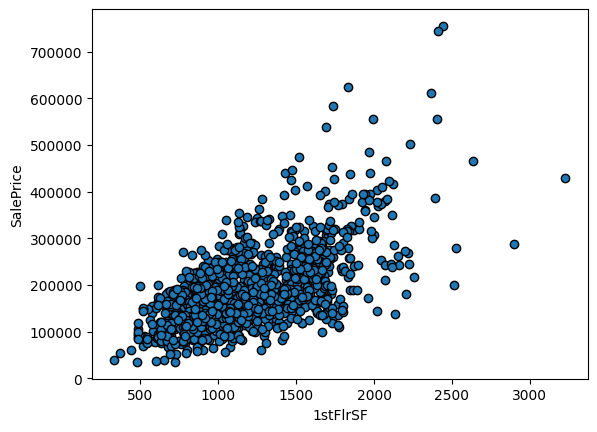

In [57]:
scatter_plot('1stFlrSF', train) #área del primer piso

No considero que haya outliers para el atributo '1stFlrSF'

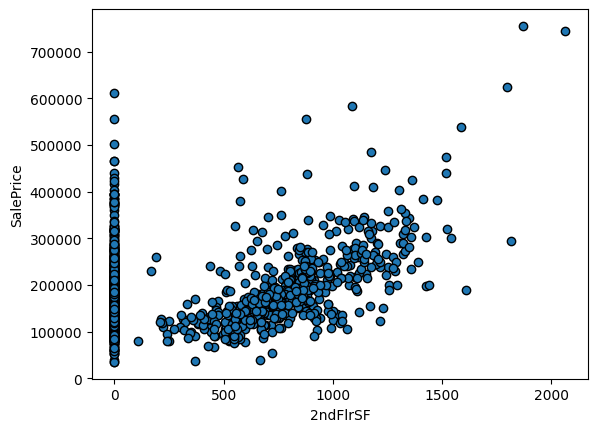

In [58]:
scatter_plot('2ndFlrSF', train) #área del segundo piso (muchas casas no tienen segundo piso y su precio sigue siendo alto)

Tampoco considero que haya outliers para '2ndFlrSF'

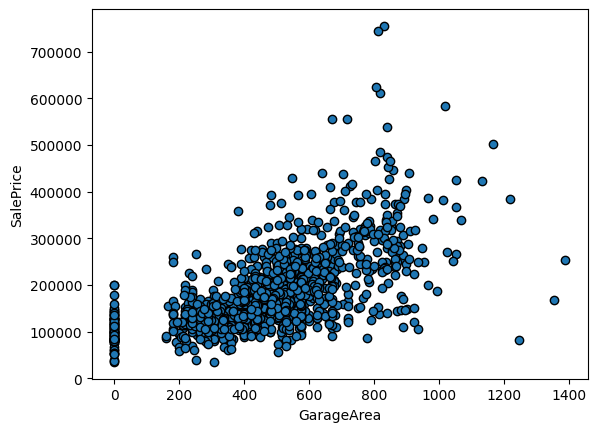

In [59]:
scatter_plot('GarageArea', train)

In [60]:
#Eliminamos los outliers y mostramos de nuevo la gráfica
train=train.drop(train[(train['GarageArea'] > 1200) & (train['SalePrice']<300000)].index)
#scatter_plot('GarageArea', train)

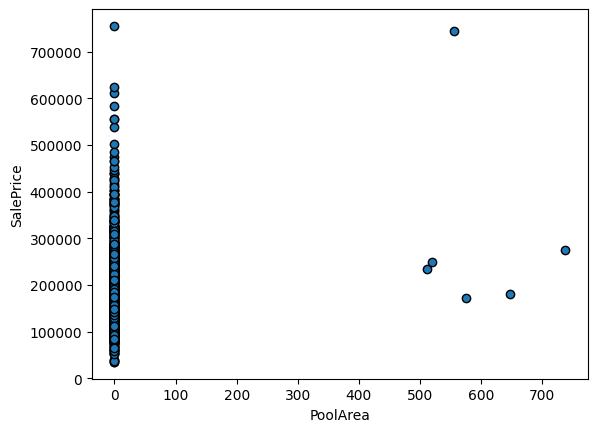

In [61]:
scatter_plot('PoolArea', train)

Vemos que las casas no tienen piscina caso ninguna, así que posteriormente trataremos los atributos relacionados con la piscina (los eliminaremos)

AHORA HACEMOS LO MISMO PERO CON VARIABLES CATEGÓRICAS

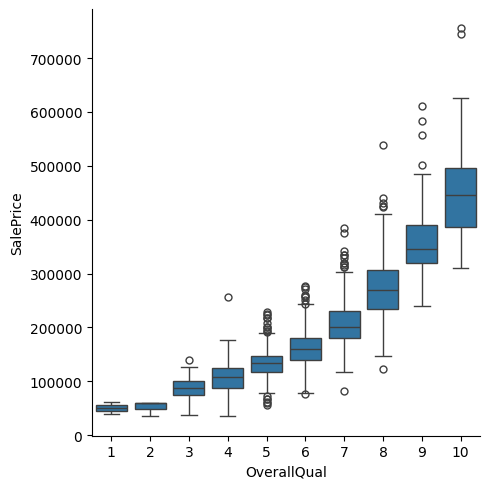

In [62]:
sns.catplot(data=train, y="SalePrice", x="OverallQual", kind="box")

Vemos que no hay outliers muy destacables.

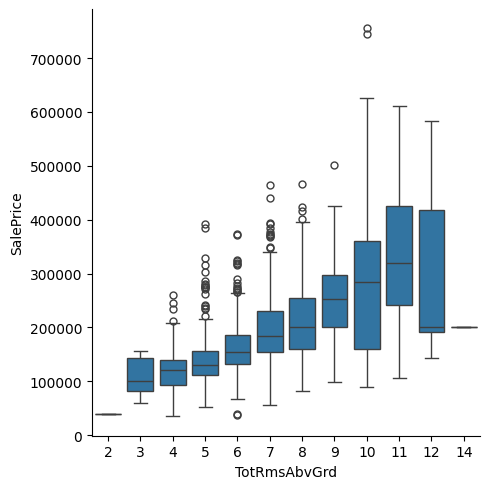

In [63]:
sns.catplot(data=train, y="SalePrice", x="TotRmsAbvGrd", kind="box")

Observamos que hay algunos outliers que podríamos eliminar pues están muy alejados del resto de ejemplos

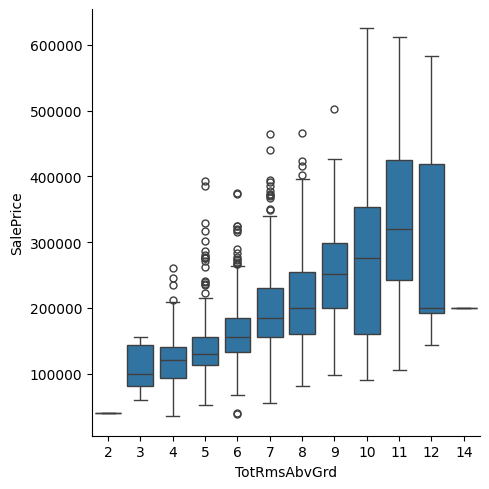

In [64]:
#Eliminamos los outliers y mostramos de nuevo la gráfica
train=train.drop(train[ (train['SalePrice']>700000)].index)
sns.catplot(data=train, y="SalePrice", x="TotRmsAbvGrd", kind="box")

Concateno la entrada de ambos para los procesos de etiquetado, que aprenda con ambos conjuntos

In [23]:
input_all = pd.concat([train.drop('SalePrice', axis=1), test])

In [24]:
input_all.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Ahora selecciono los atributos de tipo categórico (los que no son numéricos), para convertirlos a númericos

In [25]:
col_cat = list(input_all.select_dtypes(exclude=np.number).columns)
len(col_cat)
input_all[col_cat].head() #Compruebo que son realmente categóricos

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### 1. Procesamiento de valores perdidos
Antes de nada veamos el número total de valores perdidos:

In [26]:
#valores perdidos en conjunto de entrenamiento
print("Train missing values: " + str(train.isnull().sum().sum()))


#valores perdidos en conjunto de prueba
print("Test missing values: " + str(test.isnull().sum().sum()))

Train missing values: 7801
Test missing values: 7878


In [27]:
#Función para analizar los missing values de un conjunto de datos
def Valores_perdidos_columnas(datos):    
    total = datos.isnull().sum().sort_values(ascending=False)
    valores_unicos = datos.nunique() #n de valores distintos, si es 1 no nos sirve la columna
    missing_data = pd.concat([total, valores_unicos], axis=1, 
                             keys=['nº de valores perdidos', 'valores unicos'], sort = False)
    
    return missing_data

In [28]:
tabla_train=Valores_perdidos_columnas(train)
tabla_train.head(20)

,nº de valores perdidos,valores unicos
PoolQC,1448,3
MiscFeature,1400,4
Alley,1362,2
Fence,1173,4
MasVnrType,870,3
FireplaceQu,689,5
LotFrontage,258,109
GarageYrBlt,81,97
GarageCond,81,5
GarageType,81,6


In [29]:
tabla_test=Valores_perdidos_columnas(test)
tabla_test.head(20)

,nº de valores perdidos,valores unicos
PoolQC,1456,2
MiscFeature,1408,3
Alley,1352,2
Fence,1169,4
MasVnrType,894,3
FireplaceQu,730,5
LotFrontage,227,115
GarageYrBlt,78,97
GarageFinish,78,3
GarageQual,78,4


In [30]:
#Verificamos que no haya en ningún conjunto de datos un atributo con valores unicos=1
filas_valores_unicos_1 = tabla_train[tabla_train['valores unicos'] == 1].index
print("Train-Filas con valores únicos igual a 1:")
print(filas_valores_unicos_1)

Train-Filas con valores únicos igual a 1:
Index([], dtype='object')


In [31]:
#Verificamos que no haya en ningún conjunto de datos un atributo con valores unicos=1
filas_valores_unicos_1 = tabla_test[tabla_test['valores unicos'] == 1].index
print("Test-Filas con valores únicos igual a 1:")
print(filas_valores_unicos_1)

Test-Filas con valores únicos igual a 1:
Index(['Utilities'], dtype='object')


Por tanto vamos a eliminar las columnas **PoolQC, MiscFeature, Alley y Utilities**.

In [32]:
#Función para gestionar valores perdidos
def valores_perdidos_eliminar(datos):
    #PUNTO 1
    #Eliminar columnas con muchos valores perdidos. Eliminar columnas con unique_values =1
    #Como no hay piscinas, elimino todos los atributos relacionados con las piscinas. Lo mismo con la miscelánea.
    datos=datos.drop(['PoolQC', 'PoolArea', 'MiscFeature', 'MiscVal', 'Alley', 'Utilities'], axis=1)
    
    #PUNTO 2
    # Rellenar valores faltantes en la columna 'Fence' con 'nofence'
    datos['Fence'] = datos['Fence'].fillna('nofence')
    datos['FireplaceQu'] = datos['FireplaceQu'].fillna('nofireplace')
    datos['MasVnrType'] = datos['MasVnrType'].fillna('None')
    
    #PUNTO 3
    #Las variables de garaje con valores perdidos normalmente es porque no hay garaje: 'nogaraje'
    # Variables categóricas, las rellenamos con 'nogarage'
    for col in ('GarageCond', 'GarageType', 'GarageFinish', 'GarageQual'):
        datos[col] = datos[col].fillna('nogarage')
    
    # Variable numérica, la rellenamos con 0
    datos['GarageYrBlt'] = datos['GarageYrBlt'].fillna(0)
    
    #Hago lo mismo con las variables relacionadas con el basement
    # Variables categóricas, las rellenamos con 'nobasement'
    for col in ('BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2'):
        datos[col] = datos[col].fillna('None')
    
    
    #SI AÚN QUEDA ALGÚN MISSING VALUE:
    
    #PUNTO 4
    #Reemplazo los valores numéricos restantes por la mediana
    col_num = list(datos.select_dtypes(include=np.number).columns)
    if ('SalePrice' in col_num):
        col_num.remove('SalePrice')
    imputer_num = SimpleImputer(strategy="median")
    imputer_num.fit(input_all[col_num])
    datos[col_num] = imputer_num.transform(datos[col_num])
    
    #PUNTO 5
    #Reemplazo los datos categóricos restantes por el más frecuente
    imputer_cat = SimpleImputer(strategy="most_frequent")
    col_cat = list(datos.select_dtypes(exclude=np.number).columns) #Cojo los atributos categoricos
    imputer_cat.fit(datos[col_cat])
    datos[col_cat] = imputer_cat.transform(datos[col_cat])
    
    return datos

In [33]:
train_missval= valores_perdidos_eliminar(train)
test_missval= valores_perdidos_eliminar(test)

#valores perdidos en conjunto de entrenamiento
print("Train missing values: " + str(train_missval.isnull().sum().sum()))

#valores perdidos en conjunto de prueba
print("Test missing values: " + str(test_missval.isnull().sum().sum()))

Train missing values: 0
Test missing values: 0


In [34]:
#Sustituimos los dataframe originales por los modificados
train=train_missval
test=test_missval

### 2. Etiquetado (no hace falta en Catboost)

In [35]:
'''input_all = pd.concat([train.drop('SalePrice', axis=1), test])

col_cat = list(input_all.select_dtypes(exclude=np.number).columns)
len(col_cat)
input_all[col_cat].head()
'''

"input_all = pd.concat([train.drop('SalePrice', axis=1), test])\n\ncol_cat = list(input_all.select_dtypes(exclude=np.number).columns)\nlen(col_cat)\ninput_all[col_cat].head()\n"

In [36]:
'''from sklearn.preprocessing import LabelEncoder #Ahora hago el etiquetado con LabelEncoder
labelers = {}
test_l = test.copy()
train_l = train.copy()

for col in col_cat:
    labelers[col] = LabelEncoder().fit(input_all[col])
    test_l[col] = labelers[col].transform(test[col])
    train_l[col] = labelers[col].transform(train[col])
    
train_l.head()
'''

'from sklearn.preprocessing import LabelEncoder #Ahora hago el etiquetado con LabelEncoder\nlabelers = {}\ntest_l = test.copy()\ntrain_l = train.copy()\n\nfor col in col_cat:\n    labelers[col] = LabelEncoder().fit(input_all[col])\n    test_l[col] = labelers[col].transform(test[col])\n    train_l[col] = labelers[col].transform(train[col])\n    \ntrain_l.head()\n'

In [37]:
'''#Compruebo que estén todos los atributos
assert((train_l.columns == train.columns).all())
'''

'#Compruebo que estén todos los atributos\nassert((train_l.columns == train.columns).all())\n'

# Preparamos los conjuntos train y test
Defino en X_train los valores sin el atributo a predecir, y. 

También voy a eliminar el Id de entrenamiento que es problemático, pero lo guardo para el fichero de salida.

In [38]:
y_train = train.SalePrice
X_train = train.drop('SalePrice', axis=1)

if 'Id' in test:
    test.drop('Id', axis=1, inplace=True)

X_test = test

In [39]:
col_cat = list(X_train.select_dtypes(exclude=np.number).columns)
len(col_cat)
X_train[col_cat].head() #Compruebo que son realmente categóricos

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Typ,nofireplace,Attchd,RFn,TA,TA,Y,nofence,WD,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,Typ,TA,Attchd,RFn,TA,TA,Y,nofence,WD,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Typ,TA,Attchd,RFn,TA,TA,Y,nofence,WD,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,Typ,Gd,Detchd,Unf,TA,TA,Y,nofence,WD,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,Typ,TA,Attchd,RFn,TA,TA,Y,nofence,WD,Normal


# Catboost

In [40]:
from catboost import CatBoostRegressor
model_catboost=CatBoostRegressor(cat_features=col_cat, iterations=5000, learning_rate=0.01, depth=6, eval_metric='RMSE', early_stopping_rounds=20, verbose=0)
model_catboost.fit(X_train, y_train)
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(n_splits=10)
values = cross_val_score(model_catboost, X_train, y_train, scoring='neg_mean_squared_log_error', cv=cv)
print(values)
print(values.mean())

[-0.01373863 -0.009273   -0.01010465 -0.01577405 -0.01963092 -0.01076008
 -0.01405056 -0.01095397 -0.00875569 -0.01649428]
-0.012953580348792234


In [41]:
pred_cat = model_catboost.predict(X_test)

salida = pd.DataFrame({'Id': test_ids, 'SalePrice': pred_cat})
salida.to_csv("resultados/PruebaX_Catboost.csv", index=False) #Este es el fichero que podemos subir a la competición